# Mutating join

- Combina dois dataframes de acordo com matching (correspondencia, dados equivalentes) dos dois dataframes 

### Interseção (inner join)

Juntando dois dataframes usando uma coluna de referência. Retorna apenas as linhas que tenham valores que combinam (match) entre os dataframes. 

- A coluna de referência será a primeira do novo dataframe. (sem contar o index), depois vêm as colunas do dataframe da esquerda (antes do .merge()) e depois o da direita (dentro do parêntesis do método merge())
- Se houver coluna repetida entre os dfs, haverá uma troca diferenciação no label (sufixos _x e _y); assim fica mais facil de observar valores divergentes da mesma variavel nos dois dataframes originais.
- Aumenta o shape[1]/número de colunas do df.

In [ ]:
# método merge de dataframe
mesclado = df_esquerda.merge(df_direita, on ='coluna') 
    # on ='coluna' é a coluna que tem nos dois dataframes - ela será o parametro de matching dos exemplos

# definindo os sufixos  
df_esquerda.merge(df_direita, on ='coluna', suffixes = ('_ex1','_ex2')) 

# quando a coluna on estiver com label diferente em cada dataframe:
df_esquerda.merge(df_direita, left_on='tal', right_on='tal_com_outro_nome') 

### Relações entre tabelas

- One-to-one: cada linha da tabela da esquerda enxerga (está relacionada a) apenas uma linha da tabela da direita (e vice-versa).
- One-to-many: uma linha da tabela da esquerda enxerga várias linhas da direita (ou vice-versa).
- Many-to-many: varías linhas enxergam várias linhas em ambas as tabelas.

### One-to-many:

- a função merge automáticamente clona o valor one para as many linhas do outro dataframe. (aumenta o shape[0] do dataframe original para o número de matches com o segundo)


In [ ]:
# mais de uma coluna como referencia
df_esquerda.merge(df_direita, on =['coluna1', 'coluna2']) # caso os valores da coluna' não sejam únicos para diferentes linhas, 
    # e se esse par garante identidade à linha.
    # Exemplo: CEP e endereço (as casas da mesma rua tem mesmo cep, podem ter endereços repetidos na mesma cidade)
    # agora a referencia será esse par (parecido com index multinivel)

In [ ]:
# mais de dois dataframes
primeiro.merge(segundo, on =['coluna1', 'coluna2']) \ .merge(terceiro, on=['coluna3'])
    # a primeira merge chamada será a primeira a ser executada, depois é executada a depois da barra.

# se quiser unir mais, basta chamar \ e o comando novamente.

In [ ]:
# visualizando:
import matplotlib.pyplot as plt
df_final.groupby('coluna').agg('sum').plot(kind='bar', y='outra_coluna')
# agrupa por valores de coluna, soma os valores.

### Juntar à esquerda

- Une a interseção dos dataframes ao dataframe da esquerda, ou seja, não deleta as linhas sem match do df da esquerda - apenas o da direita.
- Nas novas colunas de uma linha exclusiva do dataframe da esquerda, fica o valor NaN.


In [ ]:
mesclado = df_esquerda.merge(df_direita, on ='coluna', how='left') 

### Juntar à direita

- mesma coisa só que para o dataframe da direita (o dentro do parêntesis do merge())
- A diferença entre esse how e inverter o df de fora com o de dentro e chamar o merge da esquerda mesmo - é a ordem das colunas

In [ ]:
mesclado = df_esquerda.merge(df_direita, on ='coluna', how='right') 

### União (outer join)

- Mescla os dois dataframes, sem descartar nenhuma linha sem match.
- Recomenda-se os sufixos para melhor identificação das colunas.

In [ ]:
mesclado = df_esquerda.merge(df_direita, on ='coluna', how='outer') 

### Juntar tabela nela mesma (self join)

- Usamos quando temos tabelas que contém a mesma variável só que com informações diferentes:
    Ex: uma tabela de filmes com a coluna id. Tem uma coluna 'sequel' que mostra o id do próximo filme na sequencia.
    Faremos o merge para mostrar na mesma linha o filme e sua sequencia direta se houver
    
    Outros usos: relações hierárquicas, relações sequenciais, dados de gráfico.

In [ ]:
# é só chamar o mesmo df, especificar as colunas de merge
df.merge(df, left_on='tal', right_on='outra', suffixes=('_esquerda','_direita')) 

### Juntando pelo índice

- Idêntico ao jeito que estávamos fazendo até então, a diferença é que o novo df sai com índice naquela coluna
- Índice não default (0 a n)
- Basta usar o nome da coluna índice no argumento on.
- Argumentos novos: left_index=True, right_index=True cria índice multinível.
    - Somente um deles, fixa qual será o índice do novo df.

In [ ]:
mesclado = df_esquerda.merge(df_direita, on ='id',left_index=True, right_index=True) 

# Filtering join

- Filtra observações de uma tabela de acordo com o matching ou não em outra tabela.
- Não suportado pelo pandas, teremos que codificar usando lógica.


### Semi-join

- Filtra a tabela da esquerda de acordo com (se existe) a correspondência (matching) na direita.
    - Filtrar: seleciona linhas (da tabela da esquerda)
    - Correspondência valor on igual em ambos os dataframes.
- Semelhante à interseção, só que não une as tabelas (retorna apenas as colunas da esquerda), apenas seleciona da esquerda as linhas que se uniriam em caso de merge com on='inner'.
- Em caso de one-to-many, as linhas duplicadas não são mostradas.

In [ ]:
# passo 1: unir as tabelas:
inner = df_esquerda.merge(df_direita, on ='coluna') # inner

#passo 2: teste lógico
df_esquerda['coluna'].isin(inner['coluna']) # verifica os valores no df original e no novo.
# retorna série de booleanos dizendo se os valores de df_esquerda['coluna'] tem correspondencia em inner['coluna']

# juntando os dois:
inner = df_esquerda.merge(df_direita, on ='coluna') # inner
semijoin = df_esquerda[     df_esquerda['coluna'].isin(inner['coluna'])    ]

### Anti-join

- O contrário da semi-join, só filtra as linhas que não tem correspondente na outra tabela.
    - Filtrar: seleciona linhas (da tabela da esquerda)
    - Correspondência valor on igual em ambos os dataframes.
    - Lembrando que retorna só dados do df da esquerda (sem merge)

In [ ]:
# passo 1: unir as tabelas pela esquerda: 
left = df_esquerda.merge(df_direita, on ='coluna', how='left', indicator=True) 
    # left; indicator é a coluna ('_merge') que diz se houve merge naquela linha (caso não, diz se a linha é do left ou right).

# passo 2: teste lógico
left.loc[left['_merge'] == 'left_only',  'coluna'] 
    # filtra a coluna 'coluna' pelo valor left_only de '_merge'; que significa que não houve merge naquela linha.

# juntando os dois:
left = df_esquerda.merge(df_direita, on ='coluna', how='left', indicator=True) 
filtro = left.loc[left['_merge'] == 'left_only',  'coluna'] 
antijoin = df_esquerda[   df_esquerda['coluna'].isin(filtro)   ] # filtra se o valor de 'coluna' tem a serie criada

In [ ]:
# Exercício do cara

# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))

# Concatenar (União vertical)

Até agora estávamos adicionando colunas aos dataframes (até removendo linhas com a filtragem). Adicionando dados horizontalmente.

Agora vamos adicionar linhas.

### Método concat

- Método Pandas
- adiciona vertical (axis=0) e horizontalmente (axis=1)

In [ ]:
df_novo = pd.concat([df_jan, df_fev, df_mar]) # método concat recebe lista de dataframes
    # Os indexes são mantidos (pode gerar índices repetidos).

# Para resetar os índices: ignore_index=True
pd.concat([df_jan, df_fev, df_mar], ignore_index=True)

# Para identificar a origem dos indices: ignore_index=False, keys=['jan', 'fev', 'mar']
pd.concat([df_jan, df_fev, df_mar], ignore_index=False, keys=['jan', 'fev', 'mar'])
# cria índice multinível com os valores externos igual à lista atribuída ao argumento keys

In [ ]:
# Colocando as colunas em ordem alfabética de seus labels: sort=True
pd.concat([df_jan, df_fev, df_mar], sort=True) 

- Se temos colunas diferentes entre os dataframes os valores faltantes são preenchidos com NaN

In [ ]:
# querendo so as colunas correspondentes em todos os dataframes (que tem em todos os dfs): 'outer' é default
pd.concat([df_jan, df_fev, df_mar], join='inner')

### Método append

- Método DataFrame (tem que ser chamado em um dataframe
- concat simplificado. Tem os argumentos ignore_index e sort. Não tem keys e join='outer' sempre.

In [ ]:
df_jan.append([df_fev, df_mar], ignore_index=True, sort=True)

# Verificando a integridade dos dados

Integridade: 

Os métodos concat e merge possuem essa funcionalidade.

- Problema no Merge: 
    - Esperamos que a relação seja um-pra-um. Porém, podemos ter valores (basta que sejam na coluna on) duplicados em um dos dfs (one-to-many). 
    - 

- Problema no Concat: 
    - Registros contidos em ambos os dfs geram duplicatas.

In [ ]:
# MERGE: argumento validate: retorna erro se a condição atribuida não corresponde com aquele merging
.merge(validate=None) # default
.merge(validate='one_to_one') 
.merge(validate='one_to_many') # one_to_many: uma na esquerda, várias na direita


In [ ]:
# CONCAT: argumento verify_integrity: checa se haverá duplicatas.
.concat(verify_integrity=False) # default
.concat(verify_integrity=True) 

### Mesclando dados ordenados

Dados ordenados: dados sequenciais, como registros temporais.

Método Pandas merge_ordered():
- Busca realizar uma junção que resulte em um dataframe de certa forma ordenado.
- Tem os mesmos argumentos do método merge:
    - Coluna de referência -> on, left_on, right_on
    - Tipo de junção -> argumento: how; possíveis valores: left, right, inner, outer; default: outer (default do merge é inner)
    - Nomes de colunas sobrepondo: suffixes
- Diferenças do método merge: 
    - É função pandas, então chama: pd.merge_ordered(df1, df2)
    - Default de how é outer
    

In [ ]:
novo = pd.merge_ordered(df1, df2)

Forward fill: Interpola dados faltantes usando o mesmo valor do registro (linha) anterior

In [ ]:
novo = pd.merge_ordered(df1, df2, on='date', fill_method = 'ffill')

Método Pandas merge_asof()

- Equivalente a um merge_ordered pela esquerda.
- Em caso de não correspondência, usa o valor anterior mais próximo (da coluna chave, a que vai em on) pra fazer a correspondencia. Seria uma forma de fill dos registros da esquerda antes sem correspondente.
- Exige que a coluna 'on'/chave seja ordenada.
    - Argumento direction='forward': ao invés de pegar o anterior mais próximo, pega o posterior mais próximo.
    
- Um bom uso é em série temporal em que os registros não foram feitos exatamente na mesma hora
- Outro é usar em training set de machine learning, mitiga o data leakage (um momento futuro não pode ser visto antes da hora)

In [ ]:
novo = pd.merge_asof(df1, df2, on='date', direction = 'forward')  # pega o da frente
novo = pd.merge_asof(df1, df2, on='date', direction = 'nearest')  # pega o mais próximo

# Selecionando dados

Método .query() de DataFrame
- Aceita uma string (semelhante à cláusura WHERE do SQL) que faz um teste de uma variável (coluna) ou mais
- Retorna dataframe com os registros filtrados por esse teste

In [ ]:
df.query('nike>=90') # pesquisa os registros cuja coluna 'nike' tenha valor maior igual a 90.
df.query('nike>=90 and disney<20') # E
df.query('nike>=90 or disney<20') # OU

In [ ]:
# usando query pra selecionar texto / níveis de teste
df.query('coluna == "valor1" or (coluna=="valor2" and coluna2 <20)')
    # seleciona as linhas de valor1 em coluna e as linhas de valor2 em colunas se menor que 20 em coluna2. 
    # Note que os valores de coluna são strings -> use aspas diferentes para não confundir com a aspa da string de input
    # os operadores lógicos são os mesmos do if de python

# Reshaping data

Método .melt() de DataFrame

- Muda a forma da tabela de larga pra longa (wide to long). Processo inverso da pivot table.

Tabela wide: em cada coluna temos uma variável. Melhor visualização pro usuário.
Tabela long: teremos uma coluna chamada 'variable' e uma coluna chamada 'value'. Melhor 'visualização' pro algoritmo.
    Os valores de 'variable' são os nomes das colunas da wide, e em 'value' teremos o valor dela para o registro.
    
Se na wide tinhamos um registro (índividuo) com vários valores de variáveis, na long temos um registro para cada variável despivotada. E provavelmente vários registros para um mesmo individuo.



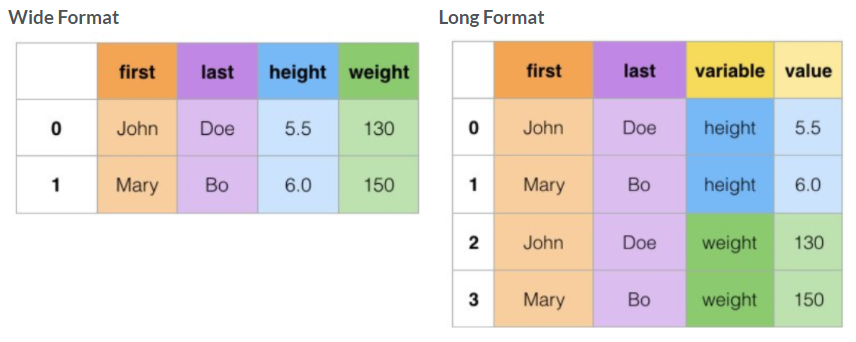

In [ ]:
# argumento id_vars (variáveis identificadoras)
melted = df.melt(id_vars=['variavel1','variavel2']) # seleciona as colunas que não serão alteradas (lista se mais de uma)

# argumento value_vars (variáveis identificadoras)
melted = df.melt(id_vars=['variavel1','variavel2'], value_vars=['variavel3','variavel4'])    
    # seleciona as colunas que serão despivotadas/desdinamizadas
    # as variáveis não presentes nessas listas serão descartadas.

In [ ]:
# trocando o nome das novas colunas: argumento var_name e value_name
df.melt(id_vars=['variavel1','variavel2'], var_name=['novo_nome'], value_name=['novo_nome2'])

In [ ]:
# bonus: renomear colunas:

# compatibilizar nomes de colunas de df1 e df2
foo = dict(zip(list(df2.columns),list(df1.columns))) # cria dicionário -> "nome_velho": "nome_novo"
df2.rename(columns = foo, inplace = True)